# Notebook 10
# 03/04/25
# EESC BC3050
## Matthew-David Ilomuanya

## Question 1

Well_ID
Lat
Lon
Depth
Drink
Si
P
S
Ca
Fe
Ba
Na
Mg
K
Mn
Sr
F
Cl
SO4
Br


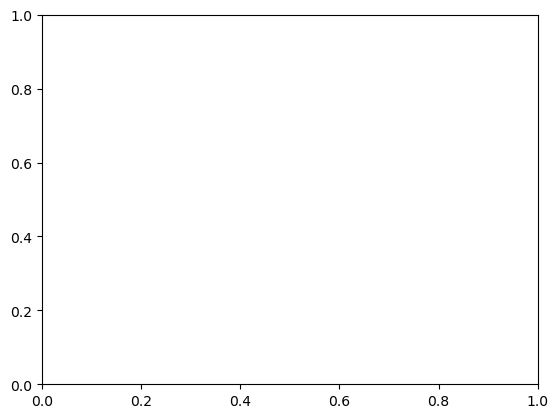

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

df=pd.read_csv('well_data.csv')

# Create a PDF file
pp = PdfPages('Notebook_10_Data.pdf')

# Create a figure and axis object
fig, ax = plt.subplots()

# Iterate through each column in the dataframe except "As"
for col in df:
    if col != "As":  # Skip the Arsenic column itself
        print(col)
        x = "As"
        y = col

        # Plot categorized data based on Arsenic levels
        ax.scatter(df[x][df.As < 10], df[y][df.As < 10],
                   color='cyan', alpha=0.5, label='<10')
        ax.scatter(df[x][np.logical_and(df.As >= 10, df.As <= 50)],
                   df[y][np.logical_and(df.As >= 10, df.As <= 50)],
                   color='lawngreen', alpha=0.5, label='10-50')
        ax.scatter(df[x][df.As > 50], df[y][df.As > 50],
                   color='r', alpha=0.5, label='>50')

        # Formatting the plot
        ax.xaxis.set_label_position('bottom')
        ax.xaxis.tick_bottom()
        ax.set_xlabel("Arsenic (As)")
        ax.set_ylabel(y)
        ax.set_title(f"As vs {y}")

        ax.legend(loc=4, fancybox=True, framealpha=0.5, facecolor='xkcd:aubergine')

        # Save to PDF
        pp.savefig()
        ax.cla()  # Clear the axis for the next plot

# Close the PDF file
pp.close()

### Generates a pdf with multiple figures plotting arsenic against other variables

## Question 2

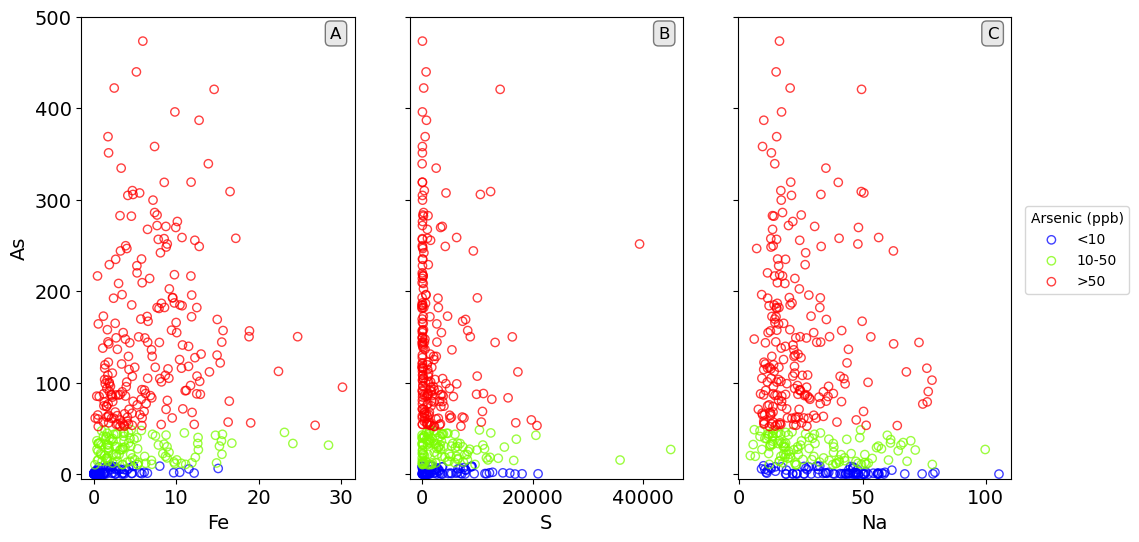

In [28]:
# Load the dataset
df = pd.read_csv('well_data.csv')

# Select three parameters to plot against Arsenic
elements = ["Fe", "S", "Na"]  # Choosing Iron, Sulfur, and Sodium as example parameters

# Define plot properties
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)
alpha = 0.75

# Create subplots
fig, ax = plt.subplots(1, len(elements), sharey=True, figsize=(12, 6))

# Iterate through selected elements and create scatter plots
for count, el in enumerate(elements):
    y = "As"
    x = el

    # Plot categorized data based on Arsenic levels
    ax[count].scatter(df[x][df.As < 10], df[y][df.As < 10],
                      alpha=alpha, color='b', label='<10', facecolor='none')
    ax[count].scatter(df[x][np.logical_and(df.As >= 10, df.As <= 50)],
                      df[y][np.logical_and(df.As >= 10, df.As <= 50)],
                      color='lawngreen', alpha=alpha, label='10-50', facecolor='none')
    ax[count].scatter(df[x][df.As > 50], df[y][df.As > 50],
                      color='r', alpha=alpha, label='>50', facecolor='none')

    # Formatting
    ax[count].set_xlabel(el, fontsize=14)  # Label with element name
    ax[count].locator_params(nbins=4, axis='x')  # Set 4 tick marks on x-axis
    ax[count].tick_params(axis='both', which='major', labelsize=14)

    # Add subplot letter labels
    ax[count].text(0.91, 0.98, chr(count + ord('A')), transform=ax[count].transAxes,
                   fontsize=12, verticalalignment='top', bbox=props)

# Shared y-axis settings
ax[0].set_ylim([-5, 500])
ax[0].set_ylabel("As", fontsize=14)

# Add legend
ax[-1].legend(title='Arsenic (ppb)', loc=(1.05, 0.4))

# Save the figure to a JPEG file
fig.savefig('Notebook_10_Three_As_Plots.jpg', dpi=400, bbox_inches='tight')

### Generates a jpeg with one figure made of subplots plotting arsenic against iron, sulfur, and sodium